## Disparity Datasets

The purpose of this notebook is to build disparity datasets in a consistent manner. 

#### Disparity Dataset Concept

* A list of all paths to left images in the dataset
* A function which converts a left image path to a right image path
* A function which converts a left image path to a left disparity path
* A function which loads an image given the filepath
* A function which loads a disparity map given the filepath
* Transformations which can be applied to all outputs
* The core: get_item returns left_img, right_img, left_disparity

In [1]:
from asset.utils import *

In [2]:
print(get_left_frames_kitti.__doc__)
print(left_to_right_kitti.__doc__)
print(left_to_disparity_kitti.__doc__)

Return the paths of all left camera images in the KITTI dataset.
Convert the path to a left image in the KITTI dataset to the path of the corresponding right image.
Convert the path to a left image in the KITTI dataset to the path of the corresponding disparity map.
    
    There are different types of disparity maps in KITTI, selectable via the mode argument. They are:
    'disp_noc_0', 'disp_occ_0', 'disp_noc_1' and 'disp_occ_1', where
    
    'noc' refers to non-occluded regions, ie, regions for which the matching correspondence is inside the image domain. 
    'occ'refers to all image regions for which ground truth could be measured
    
    '0' refers to disparity maps of first image pairs in reference frame
    '1' refers to disparity information of second image pair mapped into the reference frame via true optical flow
    


In [3]:
print(get_left_frames_monkaa.__doc__)
print(left_to_right_monkaa.__doc__)
print(left_to_disparity_monkaa.__doc__)

Return the paths of all left camera images in the Monkaa subset of the SceneFlow dataset.
Convert the path to a left image in the Monkaa subset of the SceneFlow dataset to the path of the corresponding right image.
Convert the path to a left image in the Monkaa subset of the SceneFlow dataset to the path of the corresponding disparity map.


In [4]:
print(get_left_frames_driving.__doc__)
print(left_to_right_driving.__doc__)
print(left_to_disparity_driving.__doc__)

Return the paths of all left camera images in the Driving subset of the SceneFlow dataset.
Convert the path to a left image in the Driving subset of the SceneFlow dataset to the path of the corresponding right image.
Convert the path to a left image in the Driving subset of the SceneFlow dataset to the path of the corresponding disparity map.


In [5]:
print(get_left_frames_flyingthings3d.__doc__)
print(left_to_right_flyingthings3d.__doc__)
print(left_to_disparity_flyingthings3d.__doc__)

Return the paths of all left camera images in the FlyingThings3D subset of the SceneFlow dataset.
    
    There are some exceedingly difficult examples in this subset. It is common practice to exclude these, this behaviour is controlled by the use_difficult_examples flag.
    
Convert the path to a left image in the FlyingThings3D subset of the SceneFlow dataset to the path of the corresponding right image.
Convert the path to a left image in the FlyingThings3D subset of the SceneFlow dataset to the path of the corresponding disparity map.


In [6]:
print(get_left_frames_cityscapes.__doc__)
print(left_to_right_cityscapes.__doc__)
print(left_to_disparity_cityscapes.__doc__)

Return the paths of all left camera images in the Cityscapes dataset.
    
    For each image in Cityscapes for which a semantic segmentation exists, the preceeding 19 and subsequent 10 frames are included in the dataset as well, albeit without semantic segmentation. However, disparity maps are available for the whole sequence. By setting full_sequence to True, the number of available samples is thus increased 30-fold. However, this introduces some bias, as 30 frames are from the same video sequence respectively.
    
Convert the path to a left image in the Cityscapes dataset to the path of the corresponding right image.
Convert the path to a left image in the Cityscapes dataset to the path of the corresponding disparity map.


In [7]:
print(load_image_kitti.__doc__)
print(load_disparity_kitti.__doc__)

Load the torch tensor containing an image from the KITTI dataset.
    
    The shape of the tensor is [3, 375, 1242].
    
Load the torch tensor containing a disparity map from the KITTI dataset.
    
    The shape of the tensor is [1, 375, 1242].
    


In [8]:
print(load_image_sceneflow.__doc__)
print(load_disparity_sceneflow.__doc__)

Load the torch tensor containing an image from the SceneFlow dataset.
    
    The shape of the tensor is [3, 540, 960].
    
Load the torch tensor containing a disparity map from the SceneFlow dataset.
    
    The shape of the tensor is [1, 540, 960].
    


In [9]:
left_frames_kitti = get_left_frames_kitti()
left_path = left_frames_kitti[0]
img = load_image_kitti(left_path)
img_disparity = load_disparity_kitti(left_to_disparity_kitti(left_path))

print('KITTI')
print(f'imgs shape: {img.shape}, img type: {img.dtype}, img min: {img.min()}, img max:{img.max()}')
print(f'dis shape: {img_disparity.shape}, dis type: {img_disparity.dtype}, dis min: {img_disparity.min()}, dis max:{img_disparity.max()}')

KITTI
imgs shape: torch.Size([3, 375, 1242]), img type: torch.float32, img min: 0.0, img max:1.0
dis shape: torch.Size([1, 375, 1242]), dis type: torch.float32, dis min: 0.0, dis max:76.88235473632812


In [10]:
left_frames_monkaa = get_left_frames_monkaa()
left_path = left_frames_monkaa[0]
img = load_image_sceneflow(left_path)
img_disparity = load_disparity_sceneflow(left_to_disparity_monkaa(left_path))

print('Monkaa')
print(f'imgs shape: {img.shape}, img type: {img.dtype}, img min: {img.min()}, img max:{img.max()}')
print(f'dis shape: {img_disparity.shape}, dis type: {img_disparity.dtype}, dis min: {img_disparity.min()}, dis max:{img_disparity.max()}')

Monkaa
imgs shape: torch.Size([3, 540, 960]), img type: torch.float32, img min: 0.07450980693101883, img max:1.0
dis shape: torch.Size([1, 540, 960]), dis type: torch.float32, dis min: 2.2020509243011475, dis max:126.69627380371094


In [11]:
left_frames_driving = get_left_frames_driving()
left_path = left_frames_driving[0]
img = load_image_sceneflow(left_path)
img_disparity = load_disparity_sceneflow(left_to_disparity_driving(left_path))

print('Driving')
print(f'imgs shape: {img.shape}, img type: {img.dtype}, img min: {img.min()}, img max:{img.max()}')
print(f'dis shape: {img_disparity.shape}, dis type: {img_disparity.dtype}, dis min: {img_disparity.min()}, dis max:{img_disparity.max()}')

Driving
imgs shape: torch.Size([3, 540, 960]), img type: torch.float32, img min: 0.10196078568696976, img max:1.0
dis shape: torch.Size([1, 540, 960]), dis type: torch.float32, dis min: 0.6032577753067017, dis max:269.5129089355469


In [12]:
left_frames_flyingthings3d = get_left_frames_flyingthings3d()
left_path = left_frames_flyingthings3d[0]
img = load_image_sceneflow(left_path)
img_disparity = load_disparity_sceneflow(left_to_disparity_flyingthings3d(left_path))

print('FlyingThings3D')
print(f'imgs shape: {img.shape}, img type: {img.dtype}, img min: {img.min()}, img max:{img.max()}')
print(f'dis shape: {img_disparity.shape}, dis type: {img_disparity.dtype}, dis min: {img_disparity.min()}, dis max:{img_disparity.max()}')

FlyingThings3D
imgs shape: torch.Size([3, 540, 960]), img type: torch.float32, img min: 0.0, img max:0.9921568632125854
dis shape: torch.Size([1, 540, 960]), dis type: torch.float32, dis min: 1.2133697271347046, dis max:97.19483184814453


In [13]:
left_frames_cityscapes = get_left_frames_cityscapes()
left_path = left_frames_cityscapes[0]
img = load_image_cityscapes(left_path)
img_disparity = load_disparity_cityscapes(left_to_disparity_cityscapes(left_path))

print('Cityscapes')
print(f'imgs shape: {img.shape}, img type: {img.dtype}, img min: {img.min()}, img max:{img.max()}')
print(f'dis shape: {img_disparity.shape}, dis type: {img_disparity.dtype}, dis min: {img_disparity.min()}, dis max:{img_disparity.max()}')

Cityscapes
imgs shape: torch.Size([3, 1024, 2048]), img type: torch.float32, img min: 0.0, img max:1.0
dis shape: torch.Size([1, 1024, 2048]), dis type: torch.float32, dis min: 0.0, dis max:126.0


In [14]:
print(load_image_cityscapes.__doc__)
print(load_disparity_cityscapes.__doc__)

Load the torch tensor containing an image from the Cityscapes dataset.
    
    The shape of the tensor is [3, 1024, 2048].
    
Load the torch tensor containing a disparity map from the Cityscapes dataset.
    
    The shape of the tensor is [1, 1024, 2048].
    


#### Disparity Dataset Concept

* A list of all paths to left images in the dataset
* A function which converts a left image path to a right image path
* A function which converts a left image path to a left disparity path
* A function which loads an image given the filepath
* A function which loads a disparity map given the filepath
* Transformations which can be applied to all outputs
* The core: get_item returns left_img, right_img, left_disparity

In [15]:
from datasets import DisparityDataset

print(DisparityDataset.__doc__)


    Dataset class which provides items of the form (left image, right image), disparity map.
    
    It is based on cacheing the list of paths to left images in a list, and on the assumption that there is a systematic way to       convert the path to a left image into the paths to a right image and a corresponding disparity map. This conversion is assumed 
    to be described by a function left2right and left2disparity, respectively. 
    Since the images are often saved in different forms, and so are the disparity maps, a function which loads such an image or 
    disparity given the file path is required for the images and disparities. Transforms can also be applied, it should be of a 
    joint form:  
    (img_left_transformed, img_right_transformed), disparity_transformed <- transform((img_left, img_right), disparity)
    


In [16]:
kitti_dataset = DisparityDataset(get_left_frames_kitti(), left_to_right_kitti, left_to_disparity_kitti, load_image_kitti, load_disparity_kitti)
print(len(kitti_dataset))
i = 42
(left_img, right_img), disparity_map = kitti_dataset[i]
print(left_img.shape, right_img.shape, disparity_map.shape)

200
torch.Size([3, 375, 1242]) torch.Size([3, 375, 1242]) torch.Size([1, 375, 1242])


In [17]:
monkaa_dataset = DisparityDataset(get_left_frames_monkaa(), left_to_right_monkaa, left_to_disparity_monkaa, load_image_sceneflow, load_disparity_sceneflow)
print(len(monkaa_dataset))
i = 42
(left_img, right_img), disparity_map = monkaa_dataset[i]
print(left_img.shape, right_img.shape, disparity_map.shape)

8664
torch.Size([3, 540, 960]) torch.Size([3, 540, 960]) torch.Size([1, 540, 960])


In [18]:
driving_dataset = DisparityDataset(get_left_frames_driving(), left_to_right_driving, left_to_disparity_driving, load_image_sceneflow, load_disparity_sceneflow)
print(len(driving_dataset))
i = 42
(left_img, right_img), disparity_map = driving_dataset[i]
print(left_img.shape, right_img.shape, disparity_map.shape)

4400
torch.Size([3, 540, 960]) torch.Size([3, 540, 960]) torch.Size([1, 540, 960])


In [19]:
flyingthings3d_dataset = DisparityDataset(get_left_frames_flyingthings3d(use_difficult_examples=True), left_to_right_flyingthings3d, left_to_disparity_flyingthings3d, load_image_sceneflow, load_disparity_sceneflow)
print(len(flyingthings3d_dataset))
i = 42
(left_img, right_img), disparity_map = flyingthings3d_dataset[i]
print(left_img.shape, right_img.shape, disparity_map.shape)

26760
torch.Size([3, 540, 960]) torch.Size([3, 540, 960]) torch.Size([1, 540, 960])


In [20]:
cityscapes_dataset = DisparityDataset(get_left_frames_cityscapes(full_sequence=False), left_to_right_cityscapes, left_to_disparity_cityscapes, load_image_cityscapes, load_disparity_cityscapes)
print(len(cityscapes_dataset))
i = 42
(left_img, right_img), disparity_map = cityscapes_dataset[i]
print(left_img.shape, right_img.shape, disparity_map.shape)

5000
torch.Size([3, 1024, 2048]) torch.Size([3, 1024, 2048]) torch.Size([1, 1024, 2048])


In [21]:
from transforms import *

In [22]:
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms

image = torch.rand(3,1,540,960)
i, j, h, w = transforms.RandomCrop.get_params(image, output_size=(512, 512))
print(i,j,h,w)

16 73 512 512


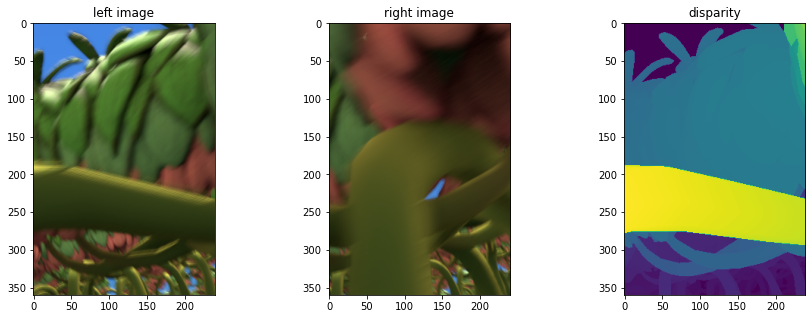

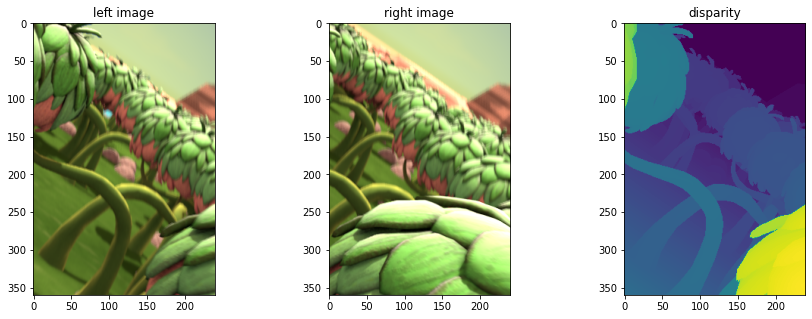

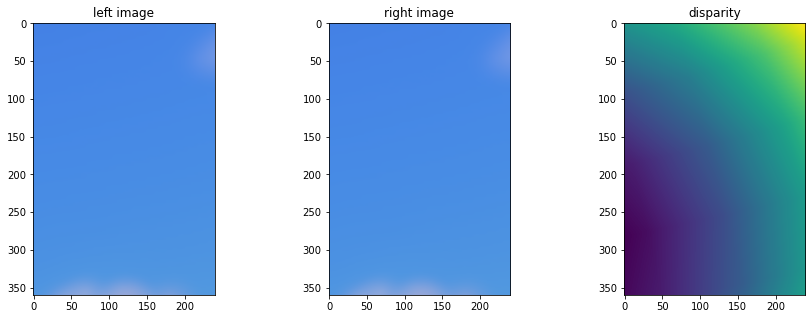

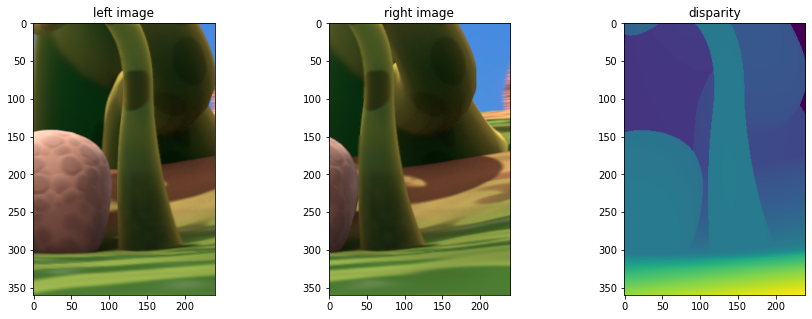

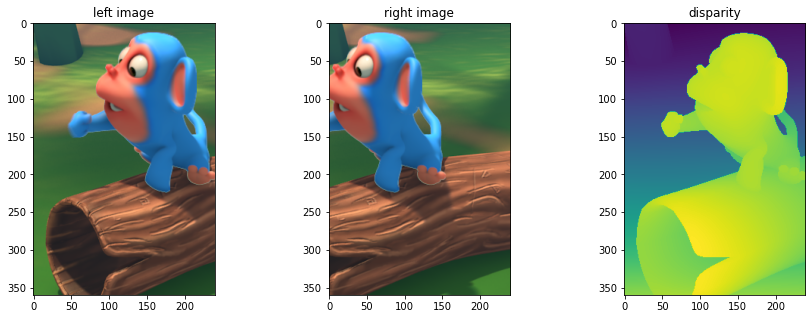

In [26]:
import matplotlib.pyplot as plt
transform = DisparityTransformCompose([DisparityTransform(transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), apply_to_disparity=False),
                                       RandomCrop(output_size=(360,240))])

inv_normalize = transforms.Normalize(
   mean= [-m/s for m, s in zip([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])],
   std= [1/s for s in [0.5, 0.5, 0.5]]
)
monkaa_dataset = DisparityDataset(get_left_frames_monkaa(), left_to_right_monkaa, left_to_disparity_monkaa, load_image_sceneflow, load_disparity_sceneflow, transform)
driving_dataset = DisparityDataset(get_left_frames_driving(), left_to_right_driving, left_to_disparity_driving, load_image_sceneflow, load_disparity_sceneflow, transform)
flyingthings3d_dataset = DisparityDataset(get_left_frames_flyingthings3d(use_difficult_examples=False), left_to_right_flyingthings3d, left_to_disparity_flyingthings3d, load_image_sceneflow, load_disparity_sceneflow, transform)

for i in np.random.choice(np.arange(len(monkaa_dataset)), size=5, replace=False):
    (img_left, img_right), img_disparity = monkaa_dataset[i]
    
    _, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(inv_normalize(img_left).permute(1,2,0))
    axes[0].set_title('left image')
    
    axes[1].imshow(inv_normalize(img_right).permute(1,2,0))
    axes[1].set_title('right image')
    
    axes[2].imshow(img_disparity.squeeze())
    axes[2].set_title('disparity')
    
    plt.show()

Length of concatenated dataset: 39130


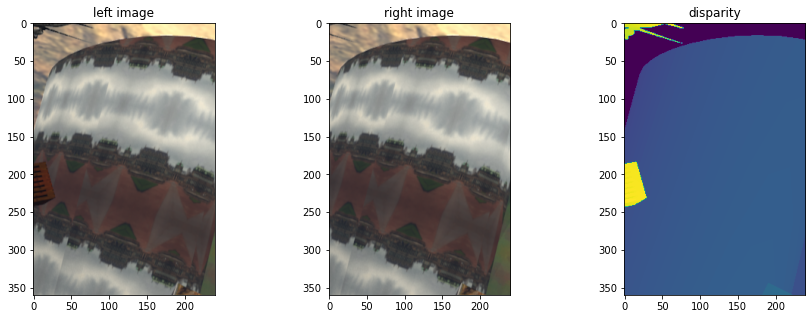

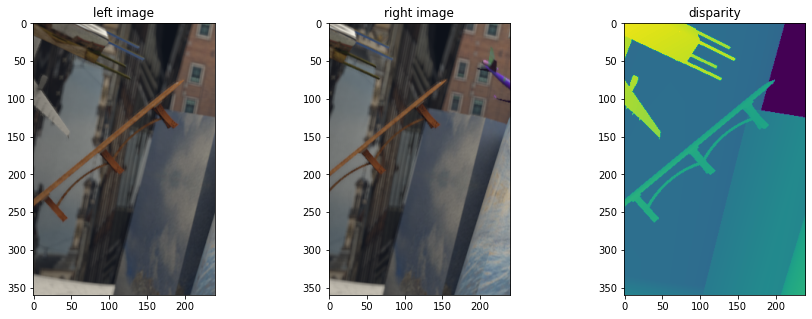

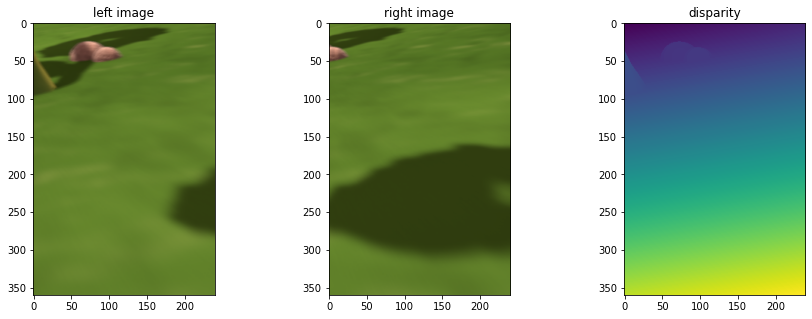

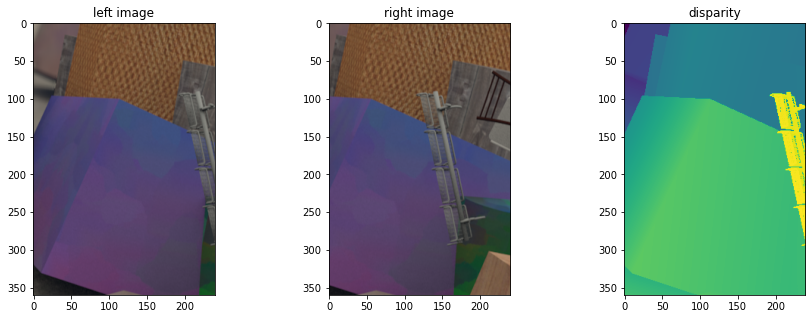

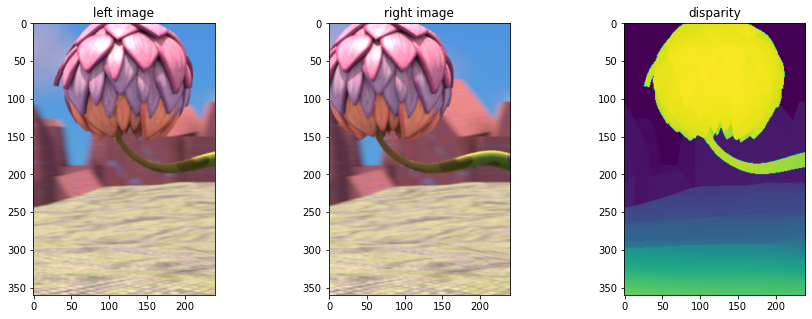

In [27]:
from torch.utils.data import ConcatDataset

concat_dataset = ConcatDataset([monkaa_dataset, driving_dataset, flyingthings3d_dataset])
print('Length of concatenated dataset:', len(concat_dataset))

for i in np.random.choice(np.arange(len(concat_dataset)), size=5, replace=False):
    (img_left, img_right), img_disparity = concat_dataset[i]
    
    _, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(inv_normalize(img_left).permute(1,2,0))
    axes[0].set_title('left image')
    
    axes[1].imshow(inv_normalize(img_right).permute(1,2,0))
    axes[1].set_title('right image')
    
    axes[2].imshow(img_disparity.squeeze())
    axes[2].set_title('disparity')
    
    plt.show()